In [85]:
import csv
import pandas as pd
import numpy as np

In [86]:
escitalopram_id = "CID100002771" #"CID100002771"
atc1 = "N06AB04"
atc2 = "N06AB10"

In [87]:
dataset_path = "/home/samuel/NYU/BDS/project/meddra/"

def read_tsv_file(file_path, headers = True):
    try:
        data = []
        with open(file_path, 'r', newline='', encoding='utf-8') as file:
            # Using the CSV reader with the tab delimiter
            reader = csv.reader(file, delimiter='\t')

            if headers == True:
                # Reading headers
                headers = next(reader)
                print("Headers:", headers)

            # Reading data rows
            for row in reader:
                data.append(row)

        # Create a Pandas DataFrame using the headers and data
        if headers == True:
            df = pd.DataFrame(data, columns=headers)
        else:
            df = pd.DataFrame(data) #, columns=headers)
        return df

    except FileNotFoundError:
        print(f"Error: File not found at '{file_path}'")
    except Exception as e:
        print(f"An error occurred: {e}")
meddra_file_path = dataset_path + 'meddra_all_se.tsv'
meddra_df = read_tsv_file(meddra_file_path)
escitalopram_sides_table = meddra_df[meddra_df[0] == escitalopram_id]
escitalopram_sides = escitalopram_sides_table[5].unique()
processed_dataset = pd.read_csv("../review_dataset/drugsComTrain_processed.csv")
escitalopram_dataset = processed_dataset[processed_dataset["drugName"] == "Escitalopram"]

Headers: ['CID100000085', 'CID000010917', 'C0000729', 'LLT', 'C0000729', 'Abdominal cramps']


In [88]:
escitalopram_dataset

Unnamed: 0      drugName                    condition  \
203         140891  Escitalopram  Generalized Anxiety Disorde   
237         214628  Escitalopram  Generalized Anxiety Disorde   
252         141047  Escitalopram                      Anxiety   
314         142104  Escitalopram                   Depression   
405         141645  Escitalopram                   Depression   
...            ...           ...                          ...   
160596      141107  Escitalopram                   Depression   
160625      141426  Escitalopram                      Anxiety   
160687      140846  Escitalopram                   Depression   
160716      141419  Escitalopram                   Depression   
161133      140531  Escitalopram                      Anxiety   

                                                   review  rating  \
203     "The time I been on lexapro I had mild side ef...     7.0   
237     "This drug is pretty great for depression, how...     5.0   
252     "Day 2. Taking for major anxiety/ slight depre...    10.0   
314     "I&#039;ve been on lexapro for several years. ...     8.0   
405     "I am a 35 year-old female. I&#039;ve always b...    10.0   
...                                                   ...     ...   
160596  "It works really good. I also have anxiety and...     9.0   
160625  "I feel compelled to share my experience becau...     9.0   
160687  "I have taken Lexapro for 10 years. I had seve...     9.0   
160716  "Sexually frustrated me and I was a little bit...     6.0   
161133  "The first 3 days of taking this I couldn&#039...     1.0   

                    date  usefulCount  \
203       April 27, 2016           13   
237      August 14, 2017            7   
252      October 6, 2015           11   
314        March 9, 2009          376   
405     November 3, 2012           81   
...                  ...          ...   
160596   August 10, 2015           65   
160625  January 27, 2014           41   
160687    April 20, 2016           32   
160716  February 9, 2014           36   
161133  January 12, 2017           10   

                                         processed_review  
203     "the time lexapro mild side effect like yawn i...  
237     "thi drug pretti great depression, howev serio...  
252     "day 2. take major anxiety/ slight depression....  
314     "i'v lexapro sever years. say initi side effec...  
405     "i 35 year-old female. i'v alway melanchol per...  
...                                                   ...  
160596  "it work realli good. also anxieti part helps....  
160625  "i feel compel share experi know other like me...  
160687  "i taken lexapro 10 years. sever depression/an...  
160716  "sexual frustrat littl bit aggress come onto i...  
161133  "the first 3 day take stop yawning!! liter yaw...  

[1292 rows x 8 columns]

In [8]:
import pandas as pd

# Create a DataFrame with side effects and initialize the count to 0
escitalopram_sides_counted = pd.DataFrame({"side_effect_name": escitalopram_sides})

# Iterate through each review
for index, row in escitalopram_dataset.iterrows():
    # Convert the review to lowercase for case-insensitive matching
    review_orig = row["review"].lower()
    review_lower = row["review"].lower()
    
    # Iterate through each side effect
    for side_effect in escitalopram_sides_counted["side_effect_name"]:
        # Replace side effect mentions with an empty string
        review_lower = review_lower.replace(side_effect.lower(), "")
        
    
    # Store the cleaned review in the dataframe
    escitalopram_dataset.loc[index, "cleaned_review"] = review_lower

# Print the first few rows of the dataframe to verify the results

/tmp/ipykernel_238229/2995517786.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[index, "cleaned_review"] = review_lower


In [9]:
escitalopram_dataset.iloc[0]["cleaned_review"]

'"the time i been on lexapro i had mild side effects like  and  really bad to the point i am only sleeping five hours or so...i can say it calms you but i haven&#039;t got the full effect of getting back to my old self again..."'

In [10]:
escitalopram_sides_counted = pd.DataFrame(escitalopram_sides, columns=["side_effect_name"]).copy()
escitalopram_sides_counted["count"] = 0
for review in escitalopram_dataset["review"]:
    for side_effect_name in escitalopram_sides_counted["side_effect_name"]:
        if side_effect_name.lower() in review.lower():
            escitalopram_sides_counted.loc[escitalopram_sides_counted["side_effect_name"] == side_effect_name, "count"] += 1
escitalopram_sides_counted.sort_values(by = "count", ascending=False)

side_effect_name  count
17                                Anxiety    785
355                            Depression    439
607                          Panic attack    213
183                                Nausea    122
120                              Headache    112
..                                    ...    ...
313        Phosphatase alkaline increased      0
314  Blood alkaline phosphatase increased      0
315           Prothrombin level increased      0
316        Electrocardiogram QT prolonged      0
413                 Mental status changes      0

[826 rows x 2 columns]

In [11]:
relevant_side_effect = list(escitalopram_sides_counted[escitalopram_sides_counted["count"] > 5]["side_effect_name"])
for relevant_effect in relevant_side_effect:
    escitalopram_dataset.loc[:, relevant_effect] = False
    for index,  review in escitalopram_dataset["review"].items():
        if relevant_effect.lower() in review.lower():
            escitalopram_dataset.loc[index, relevant_effect] = True
reg_df = escitalopram_dataset.drop(columns=["Unnamed: 0", "drugName", "condition", "review", "date", "usefulCount", "processed_review"])


/tmp/ipykernel_238229/436393038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:, relevant_effect] = False
/tmp/ipykernel_238229/436393038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:, relevant_effect] = False
/tmp/ipykernel_238229/436393038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [89]:
import re
for index, row in escitalopram_dataset.iterrows():
    # Convert the review to lowercase for case-insensitive matching
    review_orig = row["review"].lower()
    if "years old" in review_orig:
        age_index = review_orig.find("years old")
        match = re.search(r"\b\d+\b", review_orig[age_index-3:age_index+10])
        if match:
            escitalopram_dataset.loc[index, "age"] = match.group()
            
    if "year-old" in review_orig:
        age_index = review_orig.find("year-old")
        match = re.search(r"\b\d+\b", review_orig[age_index-3:age_index+10])
        if match:
            escitalopram_dataset.loc[index, "age"] = match.group()

    if "years-old" in review_orig:
        age_index = review_orig.find("years-old")
        match = re.search(r"\b\d+\b", review_orig[age_index-3:age_index+10])
        if match:
            escitalopram_dataset.loc[index, "age"] = match.group()
    
    if "year old" in review_orig:
        age_index = review_orig.find("year old")
        match = re.search(r"\b\d+\b", review_orig[age_index-3:age_index+10])
        if match:
            escitalopram_dataset.loc[index, "age"] = match.group()
    
    if "y/o" in review_orig:
        age_index = review_orig.find("y/o")
        match = re.search(r"\b\d+\b", review_orig[age_index-3:age_index+10])
        if match:
            escitalopram_dataset.loc[index, "age"] = match.group()
            
    if "years of age" in review_orig:
        age_index = review_orig.find("years of age")
        match = re.search(r"\b\d+\b", review_orig[age_index-3:age_index+10])
        if match:
            escitalopram_dataset.loc[index, "age"] = match.group()
    
found = escitalopram_dataset[escitalopram_dataset["age"] != "na"].shape[0]
total = escitalopram_dataset.shape[0]
print(f"ratio of found ages: {found/total}")

/tmp/ipykernel_238229/1919217565.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[index, "age"] = match.group()


ratio of found ages: 0.05959752321981424


In [90]:
import re
escitalopram_dataset["married"] = False
for index, row in escitalopram_dataset.iterrows():
    # Convert the review to lowercase for case-insensitive matching
    review_orig = row["review"].lower()
    if "husband" in review_orig:
        escitalopram_dataset.loc[index, "married"] = True
    
    if "wife" in review_orig:
        escitalopram_dataset.loc[index, "married"] = True
    
    if "married" in review_orig:
        escitalopram_dataset.loc[index, "married"] = True
    
    if "marriage" in review_orig:
        escitalopram_dataset.loc[index, "married"] = True
    
    if "spouse" in review_orig:
        escitalopram_dataset.loc[index, "married"] = True
    
found = escitalopram_dataset[escitalopram_dataset["married"] != False].shape[0]
total = escitalopram_dataset.shape[0]
print(f"ratio of found married: {found/total}")

/tmp/ipykernel_238229/275061147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset["married"] = False


ratio of found married: 0.053405572755417956


In [91]:
import re
escitalopram_dataset.loc[:,"children"] = False
for index, row in escitalopram_dataset.iterrows():
    # Convert the review to lowercase for case-insensitive matching
    review_orig = row["review"].lower()
    if "child" in review_orig:
        escitalopram_dataset.loc[index, "children"] = True
    
    if "children" in review_orig:
        escitalopram_dataset.loc[index, "children"] = True
    
    if "kid" in review_orig:
        escitalopram_dataset.loc[index, "children"] = True
    
    if "kids" in review_orig:
        escitalopram_dataset.loc[index, "children"] = True
    
found = escitalopram_dataset[escitalopram_dataset["children"] != False].shape[0]
total = escitalopram_dataset.shape[0]
print(f"ratio of found children: {found/total}")

/tmp/ipykernel_238229/4181311698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,"children"] = False


ratio of found children: 0.04411764705882353


In [92]:
# Initialize an empty list to store the counts
count_list = []

# Iterate over unique drug names
for drug in processed_dataset["drugName"].unique():
    # Filter the escitalopram_dataset for each drug and count occurrences
    count = (escitalopram_dataset["review"].str.contains(drug, case=False)).sum()
    
    # If count is greater than 0, add drug name and count to the list
    if count > 0:
        count_list.append({'drug_name': drug, 'count': count})

# Create a DataFrame from the list of counts
counts_df = pd.DataFrame(count_list)
counts_df = counts_df.sort_values(by="count", ascending=False)
# Display the DataFrame
print(counts_df)

/tmp/ipykernel_238229/3225493106.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  count = (escitalopram_dataset["review"].str.contains(drug, case=False)).sum()


       drug_name  count
28       Lexapro    791
37    Citalopram    125
21  Escitalopram    117
26        Zoloft     66
16         Xanax     49
..           ...    ...
12   Mirtazapine      1
27    Paroxetine      1
63       Savella      1
65     Clozapine      1
49      Tramadol      1

[98 rows x 2 columns]


In [93]:
for drug in counts_df["drug_name"]:
    print(drug)
    escitalopram_dataset.loc[:,drug] = False
    for index, row in escitalopram_dataset.iterrows():
        # Convert the review to lowercase for case-insensitive matching
        review_orig = row["review"].lower()
        if drug.lower() in review_orig:
            escitalopram_dataset.loc[index, drug] = True

Lexapro


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Citalopram


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Escitalopram


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Zoloft
Xanax


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Prozac
Paxil


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Onfi


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Celexa


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Wellbutrin


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Effexor


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Emend
RID


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Ativan


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Klonopin


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Alli


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Cymbalta


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Seroquel


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


My Way
Remeron


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Clonazepam


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Caffeine


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Valium


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Orap


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


ProFe


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Cialis
BuSpar


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Trazodone
Ovide


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Pristiq


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Effexor XR
Uta


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


IBU
Wellbutrin SR


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Adderall
Lorazepam


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Lamictal
Abilify


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Melatonin
Sertraline


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Ambien


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Commit
Cipro


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Topamax
Fluoxetine


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Reglan
Ogen


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


D3
ella


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Wellbutrin XL
Apri


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Sleep Aid
Buspirone


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Hydroxyzine
Lithium


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Tylenol
Diazepam


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Trintellix
Vistaril


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Tandem
Vitamin D3


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Viagra
Imipramine


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Codeine


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Daytrana


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Sinequan
Clobazam


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Paxil CR


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Compro


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Adderall XR


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Amitriptyline


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Advil


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Prednisone
Keflex


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


MS Contin
Tamiflu


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Vyvanse


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Lisinopril


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Progesterone
Concerta


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Quetiapine
Viibryd


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Lyrica


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Doxepin


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Zofran


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Ibuprofen
Deplin


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Propranolol


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


L-methylfolate


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Seroquel XR
Neurontin


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Librium


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Celebrex


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Mirtazapine


/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Paroxetine


/tmp/ipykernel_238229/2558772375.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Savella


/tmp/ipykernel_238229/2558772375.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Clozapine


/tmp/ipykernel_238229/2558772375.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


Tramadol


/tmp/ipykernel_238229/2558772375.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  escitalopram_dataset.loc[:,drug] = False
/tmp/ipykernel_238229/2558772375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:,drug] = False


In [94]:
escitalopram_dataset

Unnamed: 0      drugName                    condition  \
203         140891  Escitalopram  Generalized Anxiety Disorde   
237         214628  Escitalopram  Generalized Anxiety Disorde   
252         141047  Escitalopram                      Anxiety   
314         142104  Escitalopram                   Depression   
405         141645  Escitalopram                   Depression   
...            ...           ...                          ...   
160596      141107  Escitalopram                   Depression   
160625      141426  Escitalopram                      Anxiety   
160687      140846  Escitalopram                   Depression   
160716      141419  Escitalopram                   Depression   
161133      140531  Escitalopram                      Anxiety   

                                                   review  rating  \
203     "The time I been on lexapro I had mild side ef...     7.0   
237     "This drug is pretty great for depression, how...     5.0   
252     "Day 2. Taking for major anxiety/ slight depre...    10.0   
314     "I&#039;ve been on lexapro for several years. ...     8.0   
405     "I am a 35 year-old female. I&#039;ve always b...    10.0   
...                                                   ...     ...   
160596  "It works really good. I also have anxiety and...     9.0   
160625  "I feel compelled to share my experience becau...     9.0   
160687  "I have taken Lexapro for 10 years. I had seve...     9.0   
160716  "Sexually frustrated me and I was a little bit...     6.0   
161133  "The first 3 days of taking this I couldn&#039...     1.0   

                    date  usefulCount  \
203       April 27, 2016           13   
237      August 14, 2017            7   
252      October 6, 2015           11   
314        March 9, 2009          376   
405     November 3, 2012           81   
...                  ...          ...   
160596   August 10, 2015           65   
160625  January 27, 2014           41   
160687    April 20, 2016           32   
160716  February 9, 2014           36   
161133  January 12, 2017           10   

                                         processed_review age  married  ...  \
203     "the time lexapro mild side effect like yawn i...  na    False  ...   
237     "thi drug pretti great depression, howev serio...  na    False  ...   
252     "day 2. take major anxiety/ slight depression....  na    False  ...   
314     "i'v lexapro sever years. say initi side effec...  na    False  ...   
405     "i 35 year-old female. i'v alway melanchol per...  35    False  ...   
...                                                   ...  ..      ...  ...   
160596  "it work realli good. also anxieti part helps....  na    False  ...   
160625  "i feel compel share experi know other like me...  na    False  ...   
160687  "i taken lexapro 10 years. sever depression/an...  na    False  ...   
160716  "sexual frustrat littl bit aggress come onto i...  na    False  ...   
161133  "the first 3 day take stop yawning!! liter yaw...  na    False  ...   

        L-methylfolate  Seroquel XR  Neurontin  Librium  Celebrex  \
203              False        False      False    False     False   
237              False        False      False    False     False   
252              False        False      False    False     False   
314              False        False      False    False     False   
405              False        False      False    False     False   
...                ...          ...        ...      ...       ...   
160596           False        False      False    False     False   
160625           False        False      False    False     False   
160687           False        False      False    False     False   
160716           False        False      False    False     False   
161133           False        False      False    False     False   

        Mirtazapine  Paroxetine  Savella  Clozapine  Tramadol  
203           False       False    False      False     False  

In [95]:
#patient_matrix = escitalopram_dataset[escitalopram_dataset["age"] != "na"][["age", "children", "married"]]
patient_matrix = escitalopram_dataset.drop(columns=["Unnamed: 0", "drugName", "condition", "review", "date", "usefulCount", "processed_review", "cleaned_review"])
query_patient = patient_matrix.iloc[0]
query_patient["age"]

KeyError: "['cleaned_review'] not found in axis"

rating   Anxiety  Chest pain  Constipation  Dizziness      Rash  \
405     0.747241  0.648378   -0.200035           NaN  -0.200035 -0.113961   
3481    0.263732  0.648378   -0.200035           NaN  -0.200035  8.661004   
4713   -3.120830  0.648378    4.934199           NaN  -0.200035 -0.113961   
9377    0.747241 -1.522279   -0.200035           NaN  -0.200035 -0.113961   
10497  -0.703286 -1.522279   -0.200035           NaN  -0.200035 -0.113961   
...          ...       ...         ...           ...        ...       ...   
147717 -0.219777  0.648378   -0.200035           NaN  -0.200035 -0.113961   
151016  0.747241 -1.522279   -0.200035           NaN  -0.200035 -0.113961   
151233  0.747241 -1.522279   -0.200035           NaN  -0.200035 -0.113961   
152818  0.747241  0.648378   -0.200035           NaN   4.934199 -0.113961   
153049 -0.219777  0.648378   -0.200035           NaN  -0.200035 -0.113961   

         Fatigue  Headache  Major depression    Nausea  ...  Acarbose  \
405    -0.200035 -0.426870         -0.162235 -0.383817  ...       NaN   
3481   -0.200035 -0.426870         -0.162235 -0.383817  ...       NaN   
4713   -0.200035 -0.426870         -0.162235 -0.383817  ...       NaN   
9377   -0.200035 -0.426870         -0.162235 -0.383817  ...       NaN   
10497   4.934199  2.312211         -0.162235  2.571573  ...       NaN   
...          ...       ...               ...       ...  ...       ...   
147717 -0.200035 -0.426870         -0.162235 -0.383817  ...       NaN   
151016 -0.200035 -0.426870         -0.162235 -0.383817  ...       NaN   
151233  4.934199 -0.426870         -0.162235 -0.383817  ...       NaN   
152818 -0.200035 -0.426870         -0.162235 -0.383817  ...       NaN   
153049 -0.200035 -0.426870         -0.162235 -0.383817  ...       NaN   

        Antihemophilic factor  Zileuton  Amethyst  Midamor  Oxytocin  Iluvien  \
405                       NaN       NaN       NaN      NaN       NaN      NaN   
3481                      NaN       NaN       NaN      NaN       NaN      NaN   
4713                      NaN       NaN       NaN      NaN       NaN      NaN   
9377                      NaN       NaN       NaN      NaN       NaN      NaN   
10497                     NaN       NaN       NaN      NaN       NaN      NaN   
...                       ...       ...       ...      ...       ...      ...   
147717                    NaN       NaN       NaN      NaN       NaN      NaN   
151016                    NaN       NaN       NaN      NaN       NaN      NaN   
151233                    NaN       NaN       NaN      NaN       NaN      NaN   
152818                    NaN       NaN       NaN      NaN       NaN      NaN   
153049                    NaN       NaN       NaN      NaN       NaN      NaN   

        Mavik  Aldomet  Grifulvin V  
405       NaN      NaN          NaN  
3481      NaN      NaN          NaN  
4713      NaN      NaN          NaN  
9377      NaN      NaN          NaN  
10497     NaN      NaN          NaN  
...       ...      ...          ...  
147717    NaN      NaN          NaN  
151016    NaN      NaN          NaN  
151233    NaN      NaN          NaN  
152818    NaN      NaN          NaN  
153049    NaN      NaN          NaN  

[77 rows x 3477 columns]

In [97]:
patient_matrix

rating       age   married  children   Lexapro  Citalopram  \
405     0.747241  0.514775 -0.288807  2.917702  0.608383   -0.361433   
3481    0.263732  1.243025 -0.288807 -0.338284 -1.622355   -0.361433   
4713   -3.120830 -0.317512 -0.288807  2.917702 -1.622355   -0.361433   
9377    0.747241 -0.317512 -0.288807 -0.338284  0.608383   -0.361433   
10497  -0.703286 -0.317512 -0.288807 -0.338284  0.608383   -0.361433   
...          ...       ...       ...       ...       ...         ...   
147717 -0.219777 -0.629619 -0.288807 -0.338284  0.608383   -0.361433   
151016  0.747241 -0.317512 -0.288807 -0.338284  0.608383   -0.361433   
151233  0.747241  0.722846 -0.288807 -0.338284  0.608383   -0.361433   
152818  0.747241  0.410739  3.417551 -0.338284  0.608383   -0.361433   
153049 -0.219777 -0.629619 -0.288807 -0.338284  0.608383   -0.361433   

        Escitalopram    Zoloft     Xanax    Prozac  ...  L-methylfolate  \
405        -0.361433 -0.232557 -0.162235 -0.113961  ...             NaN   
3481       -0.361433 -0.232557 -0.162235 -0.113961  ...             NaN   
4713       -0.361433 -0.232557 -0.162235 -0.113961  ...             NaN   
9377       -0.361433 -0.232557 -0.162235 -0.113961  ...             NaN   
10497      -0.361433 -0.232557 -0.162235 -0.113961  ...             NaN   
...              ...       ...       ...       ...  ...             ...   
147717     -0.361433 -0.232557 -0.162235 -0.113961  ...             NaN   
151016     -0.361433 -0.232557 -0.162235 -0.113961  ...             NaN   
151233     -0.361433 -0.232557 -0.162235 -0.113961  ...             NaN   
152818     -0.361433 -0.232557 -0.162235 -0.113961  ...             NaN   
153049     -0.361433 -0.232557 -0.162235 -0.113961  ...             NaN   

        Seroquel XR  Neurontin  Librium  Celebrex  Mirtazapine  Paroxetine  \
405             NaN        NaN      NaN -0.113961          NaN         NaN   
3481            NaN        NaN      NaN -0.113961          NaN         NaN   
4713            NaN        NaN      NaN -0.113961          NaN         NaN   
9377            NaN        NaN      NaN -0.113961          NaN         NaN   
10497           NaN        NaN      NaN -0.113961          NaN         NaN   
...             ...        ...      ...       ...          ...         ...   
147717          NaN        NaN      NaN -0.113961          NaN         NaN   
151016          NaN        NaN      NaN -0.113961          NaN         NaN   
151233          NaN        NaN      NaN -0.113961          NaN         NaN   
152818          NaN        NaN      NaN -0.113961          NaN         NaN   
153049          NaN        NaN      NaN -0.113961          NaN         NaN   

        Savella  Clozapine  Tramadol  
405         NaN        NaN       NaN  
3481        NaN        NaN       NaN  
4713        NaN        NaN       NaN  
9377        NaN        NaN       NaN  
10497       NaN        NaN       NaN  
...         ...        ...       ...  
147717      NaN        NaN       NaN  
151016      NaN        NaN       NaN  
151233      NaN        NaN       NaN  
152818      NaN        NaN       NaN  
153049      NaN        NaN       NaN  

[77 rows x 102 columns]

In [113]:
patient_matrix = escitalopram_dataset[escitalopram_dataset["age"] != "na"].drop(columns=["Unnamed: 0", "drugName", "condition", "review", "date", "usefulCount", "processed_review", "rating"])

patient_matrix = patient_matrix.dropna(axis=1, how='any')

patient_matrix

age  married  children  Lexapro  Citalopram  Escitalopram  Zoloft  \
405     35    False      True     True       False         False   False   
3481    50    False     False    False       False         False   False   
4713    26    False      True    False       False         False   False   
9377    26    False     False     True       False         False   False   
10497   26    False     False     True       False         False   False   
...     ..      ...       ...      ...         ...           ...     ...   
147717  23    False     False     True       False         False   False   
151016  26    False     False     True       False         False   False   
151233  37    False     False     True       False         False   False   
152818  34     True     False     True       False         False   False   
153049  23    False     False     True       False         False   False   

        Xanax  Prozac  Paxil  ...  L-methylfolate  Seroquel XR  Neurontin  \
405     False   False  False  ...           False        False      False   
3481    False   False  False  ...           False        False      False   
4713    False   False  False  ...           False        False      False   
9377    False   False  False  ...           False        False      False   
10497   False   False  False  ...           False        False      False   
...       ...     ...    ...  ...             ...          ...        ...   
147717  False   False  False  ...           False        False      False   
151016  False   False  False  ...           False        False      False   
151233  False   False  False  ...           False        False      False   
152818  False   False  False  ...           False        False      False   
153049  False   False  False  ...           False        False      False   

        Librium  Celebrex  Mirtazapine  Paroxetine  Savella  Clozapine  \
405       False     False        False       False    False      False   
3481      False     False        False       False    False      False   
4713      False     False        False       False    False      False   
9377      False     False        False       False    False      False   
10497     False     False        False       False    False      False   
...         ...       ...          ...         ...      ...        ...   
147717    False     False        False       False    False      False   
151016    False     False        False       False    False      False   
151233    False     False        False       False    False      False   
152818    False     False        False       False    False      False   
153049    False     False        False       False    False      False   

        Tramadol  
405        False  
3481       False  
4713       False  
9377       False  
10497      False  
...          ...  
147717     False  
151016     False  
151233     False  
152818     False  
153049     False  

[77 rows x 101 columns]

In [115]:
patient_matrix_norm

age   married  children   Lexapro  Citalopram  Escitalopram  \
405     0.514775 -0.288807  2.917702  0.608383   -0.361433     -0.361433   
3481    1.243025 -0.288807 -0.338284 -1.622355   -0.361433     -0.361433   
4713   -0.317512 -0.288807  2.917702 -1.622355   -0.361433     -0.361433   
9377   -0.317512 -0.288807 -0.338284  0.608383   -0.361433     -0.361433   
10497  -0.317512 -0.288807 -0.338284  0.608383   -0.361433     -0.361433   
...          ...       ...       ...       ...         ...           ...   
147717 -0.629619 -0.288807 -0.338284  0.608383   -0.361433     -0.361433   
151016 -0.317512 -0.288807 -0.338284  0.608383   -0.361433     -0.361433   
151233  0.722846 -0.288807 -0.338284  0.608383   -0.361433     -0.361433   
152818  0.410739  3.417551 -0.338284  0.608383   -0.361433     -0.361433   
153049 -0.629619 -0.288807 -0.338284  0.608383   -0.361433     -0.361433   

          Zoloft     Xanax    Prozac     Paxil  ...  L-methylfolate  \
405    -0.232557 -0.162235 -0.113961 -0.232557  ...             NaN   
3481   -0.232557 -0.162235 -0.113961 -0.232557  ...             NaN   
4713   -0.232557 -0.162235 -0.113961 -0.232557  ...             NaN   
9377   -0.232557 -0.162235 -0.113961 -0.232557  ...             NaN   
10497  -0.232557 -0.162235 -0.113961 -0.232557  ...             NaN   
...          ...       ...       ...       ...  ...             ...   
147717 -0.232557 -0.162235 -0.113961 -0.232557  ...             NaN   
151016 -0.232557 -0.162235 -0.113961 -0.232557  ...             NaN   
151233 -0.232557 -0.162235 -0.113961 -0.232557  ...             NaN   
152818 -0.232557 -0.162235 -0.113961 -0.232557  ...             NaN   
153049 -0.232557 -0.162235 -0.113961 -0.232557  ...             NaN   

        Seroquel XR  Neurontin  Librium  Celebrex  Mirtazapine  Paroxetine  \
405             NaN        NaN      NaN -0.113961          NaN         NaN   
3481            NaN        NaN      NaN -0.113961          NaN         NaN   
4713            NaN        NaN      NaN -0.113961          NaN         NaN   
9377            NaN        NaN      NaN -0.113961          NaN         NaN   
10497           NaN        NaN      NaN -0.113961          NaN         NaN   
...             ...        ...      ...       ...          ...         ...   
147717          NaN        NaN      NaN -0.113961          NaN         NaN   
151016          NaN        NaN      NaN -0.113961          NaN         NaN   
151233          NaN        NaN      NaN -0.113961          NaN         NaN   
152818          NaN        NaN      NaN -0.113961          NaN         NaN   
153049          NaN        NaN      NaN -0.113961          NaN         NaN   

        Savella  Clozapine  Tramadol  
405         NaN        NaN       NaN  
3481        NaN        NaN       NaN  
4713        NaN        NaN       NaN  
9377        NaN        NaN       NaN  
10497       NaN        NaN       NaN  
...         ...        ...       ...  
147717      NaN        NaN       NaN  
151016      NaN        NaN       NaN  
151233      NaN        NaN       NaN  
152818      NaN        NaN       NaN  
153049      NaN        NaN       NaN  

[77 rows x 101 columns]

In [117]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder

# patient_matrix = escitalopram_dataset[escitalopram_dataset["age"] != "na"].drop(columns=["Unnamed: 0", "drugName", "condition", "review", "date", "usefulCount", "processed_review"])
# patient_matrix = patient_matrix.dropna(axis=1, how='any')
label_encoder = LabelEncoder()
for col in patient_matrix.columns:
    if patient_matrix[col].dtype == 'object':
        patient_matrix[col] = label_encoder.fit_transform(patient_matrix[col])

# Normalize the data
patient_matrix_norm = (patient_matrix - patient_matrix.mean()) / patient_matrix.std()

# Define the query patient
query_patient = patient_matrix_norm.dropna(axis=1, how='any').iloc[0]

#alculate cosine similarity between query patient and all other patients
cosine_similarities = cosine_similarity(patient_matrix_norm.dropna(axis=1, how='any'), [query_patient])

patient_matrix["similarity"] = 0


for idx, similarity in enumerate(cosine_similarities):
    patient_matrix.iloc[idx,patient_matrix.columns.get_loc("similarity")] = similarity


/tmp/ipykernel_238229/3161833585.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-0.06737737143998299' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  patient_matrix.iloc[idx,patient_matrix.columns.get_loc("similarity")] = similarity


In [105]:
cosine_similarities[1]

array([-0.03856584])

In [118]:
patient_matrix.sort_values(by="similarity", as
                           cending=False)

age  married  children  Lexapro  Citalopram  Escitalopram  Zoloft  \
405      22    False      True     True       False         False   False   
146085    6    False      True     True       False         False   False   
114762    0    False      True     True       False         False   False   
4713     14    False      True    False       False         False   False   
73468    11    False      True    False       False         False   False   
...     ...      ...       ...      ...         ...           ...     ...   
118977    9    False     False    False       False         False   False   
57736    12    False     False    False        True          True   False   
14700    15    False     False    False        True          True   False   
125722   10    False     False    False        True          True   False   
89260     8    False     False    False        True          True   False   

        Xanax  Prozac  Paxil  ...  Seroquel XR  Neurontin  Librium  Celebrex  \
405     False   False  False  ...        False      False    False     False   
146085  False   False  False  ...        False      False    False     False   
114762  False   False  False  ...        False      False    False     False   
4713    False   False  False  ...        False      False    False     False   
73468   False   False  False  ...        False      False    False     False   
...       ...     ...    ...  ...          ...        ...      ...       ...   
118977  False   False  False  ...        False      False    False     False   
57736   False   False  False  ...        False      False    False     False   
14700   False   False  False  ...        False      False    False     False   
125722  False   False  False  ...        False      False    False     False   
89260   False   False  False  ...        False      False    False     False   

        Mirtazapine  Paroxetine  Savella  Clozapine  Tramadol  similarity  
405           False       False    False      False     False    1.000000  
146085        False       False    False      False     False    0.869500  
114762        False       False    False      False     False    0.777237  
4713          False       False    False      False     False    0.746815  
73468         False       False    False      False     False    0.723421  
...             ...         ...      ...        ...       ...         ...  
118977        False       False    False      False     False   -0.237054  
57736         False       False    False      False     False   -0.239284  
14700         False       False    False      False     False   -0.256413  
125722        False       False    False      False     False   -0.272565  
89260         False       False    False      False     False   -0.277814  

[77 rows x 102 columns]

In [127]:
escitalopram_dataset["Unnamed: 0"]

203       140891
237       214628
252       141047
314       142104
405       141645
           ...  
160596    141107
160625    141426
160687    140846
160716    141419
161133    140531
Name: Unnamed: 0, Length: 1292, dtype: int64

In [15]:
conditions = (
    (escitalopram_dataset["children"] == True) &  # Check if 'children' column is True
    (escitalopram_dataset["age"] != "na") #&       # Check if 'age' column is not "na"
    # (escitalopram_dataset["married"] == True)     # Check if 'married' column is True
)

# Filter the DataFrame based on the conditions
escitalopram_dataset[conditions]

Unnamed: 0      drugName        condition  \
405         141645  Escitalopram       Depression   
4713        141156  Escitalopram          Anxiety   
39533       141805  Escitalopram          Anxiety   
72830       142020  Escitalopram       Depression   
73468       140657  Escitalopram          Anxiety   
86780       141469  Escitalopram          Anxiety   
114762      141629  Escitalopram  Bipolar Disorde   
146085      141039  Escitalopram          Anxiety   

                                                   review  rating  \
405     "I am a 35 year-old female. I&#039;ve always b...    10.0   
4713    "ok so on day 3 I went out for dinner last nig...     2.0   
39533   "I&#039;m a 47 year old female, been on 10mg L...     8.0   
72830   "I have been taking Lexapro for 5 months now a...     8.0   
73468   "A miracle pill! I am 23 years old &amp; I had...    10.0   
86780   "I am a 26 year old who has had anxiety since ...    10.0   
114762  "I have had bipolar since I was 10 years old a...    10.0   
146085  "I&#039;m 19 years old and I&#039;ve had anxie...     1.0   

                     date  usefulCount  \
405      November 3, 2012           81   
4713    September 4, 2015            0   
39533   December 30, 2010           16   
72830    January 19, 2009           22   
73468      March 31, 2017           16   
86780   November 30, 2013           99   
114762     April 13, 2012           51   
146085  November 13, 2015           17   

                                         processed_review  \
405     "i 35 year-old female. i'v alway melanchol per...   
4713    "ok day 3 went dinner last night child' birthd...   
39533   "i'm 47 year old female, 10mg lexapro 5 year a...   
72830   "i take lexapro 5 month realli work me. 30 yea...   
73468   "a miracl pill! 23 year old & anxieti sinc chi...   
86780   "i 26 year old anxieti sinc child. i'v gone ro...   
114762  "i bipolar sinc 10 year old lexapro medicin he...   
146085  "i'm 19 year old i'v anxieti sinc kid. famili ...   

                                           cleaned_review  Anxiety  ...  \
405     "i am a 35 year-old female. i&#039;ve always b...     True  ...   
4713    "ok so on day 3 i went out for dinner last nig...     True  ...   
39533   "i&#039;m a 47 year old female, been on 10mg l...     True  ...   
72830   "i have been taking lexapro for 5 months now a...    False  ...   
73468   "a miracle pill! i am 23 years old &amp; i had...     True  ...   
86780   "i am a 26 year old who has had  since i was a...     True  ...   
114762  "i have had bipolar since i was 10 years old a...    False  ...   
146085  "i&#039;m 19 years old and i&#039;ve had  sinc...     True  ...   

        Irritability  Lethargy  Night sweats  Panic attack  Upset stomach  \
405            False     False         False         False          False   
4713           False     False         False          True          False   
39533          False     False         False         False          False   
72830          False     False         False         False          False   
73468          False     False         False         False          False   
86780          False     False         False          True          False   
114762         False     False         False         False          False   
146085         False     False         False          True          False   

        Crying  Anxiety attack  age  married  children  
405      False           False   35    False      True  
4713     False           False   26    False      True  
39533    False           False   47    False      True  
72830    False           False   30     True      True  
73468    False           False   23    False      True  
86780    False           False   26    False      True  
114762   False           False   10    False      True  
146085   False           False   19    False      True  

[8 rows x 49 columns]

In [13]:
reg_df = escitalopram_dataset.drop(columns=["Unnamed: 0", "drugName", "condition", "review", "date", "usefulCount", "processed_review", "cleaned_review", "age"])


In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

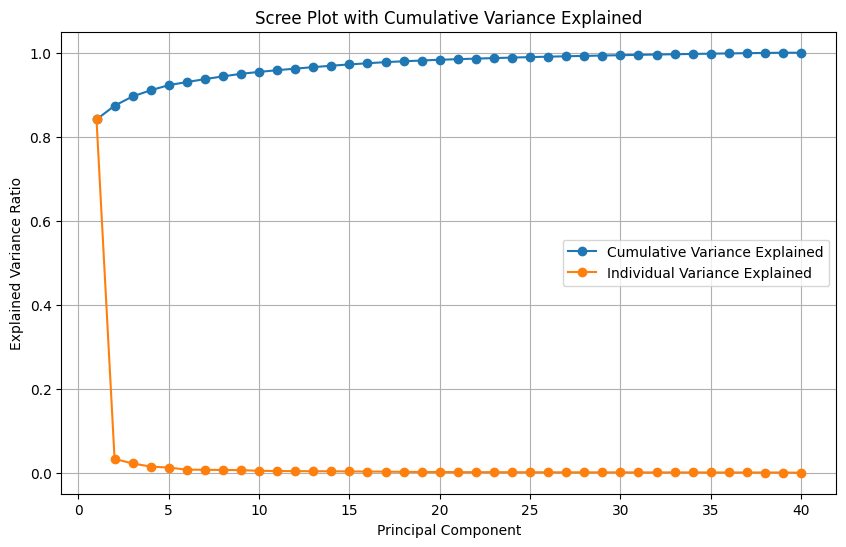

In [15]:
# Initialize PCA without specifying the number of components
pca = PCA()

# Fit PCA to the boolean data
pca.fit(reg_df)

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', label='Cumulative Variance Explained')
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Individual Variance Explained')
plt.title('Scree Plot with Cumulative Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
reg_df

rating  Anxiety  Chest pain  Constipation  Dizziness   Rash  Fatigue  \
203        7.0    False       False         False      False  False    False   
237        5.0     True       False         False      False  False    False   
252       10.0     True       False         False      False  False    False   
314        8.0    False       False         False      False  False    False   
405       10.0     True       False         False      False  False    False   
...        ...      ...         ...           ...        ...    ...      ...   
160596     9.0     True       False         False      False  False    False   
160625     9.0     True       False         False      False  False    False   
160687     9.0     True       False         False      False  False    False   
160716     6.0    False       False         False      False  False    False   
161133     1.0     True       False         False      False  False    False   

        Headache  Major depression  Nausea  ...  Hunger  Irritability  \
203        False             False   False  ...   False         False   
237        False             False   False  ...    True         False   
252        False             False   False  ...   False         False   
314        False             False   False  ...   False         False   
405        False             False   False  ...   False         False   
...          ...               ...     ...  ...     ...           ...   
160596     False             False   False  ...   False         False   
160625      True             False   False  ...   False         False   
160687      True             False   False  ...   False         False   
160716     False             False   False  ...   False         False   
161133     False             False   False  ...   False         False   

        Lethargy  Night sweats  Panic attack  Upset stomach  Crying  \
203        False         False         False          False   False   
237        False         False         False          False   False   
252        False         False         False          False   False   
314        False         False         False          False   False   
405        False         False         False          False   False   
...          ...           ...           ...            ...     ...   
160596     False         False         False          False   False   
160625     False         False         False          False   False   
160687     False         False         False          False   False   
160716     False         False         False          False   False   
161133     False         False         False          False   False   

        Anxiety attack  married  children  
203              False    False     False  
237              False    False     False  
252              False    False     False  
314              False    False     False  
405              False    False      True  
...                ...      ...       ...  
160596           False    False     False  
160625           False    False     False  
160687           False    False     False  
160716           False    False     False  
161133           False    False     False  

[1292 rows x 40 columns]

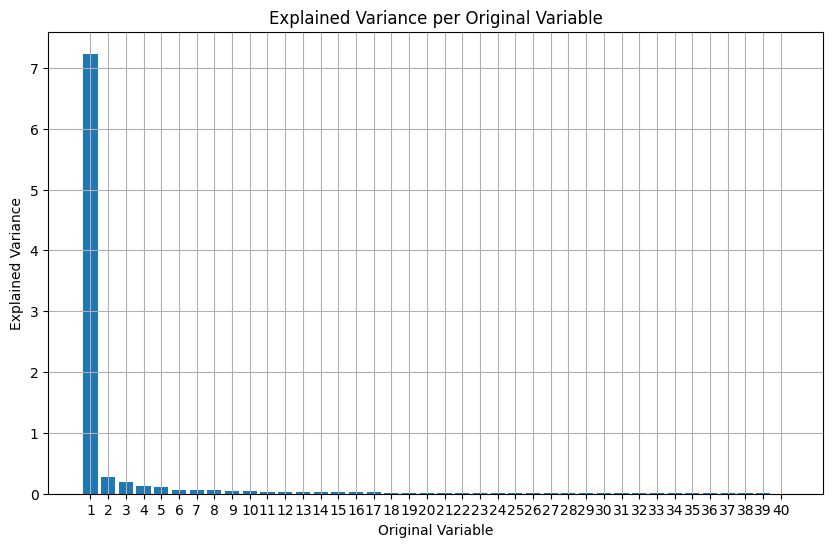

In [17]:
loadings = pca.components_

# Calculate the variance explained by each original variable
explained_variance_per_variable = np.var(reg_df @ loadings.T, axis=0)

# Plot the explained variance per original variable
plt.figure(figsize=(10, 6))
plt.bar(np.arange(1, len(explained_variance_per_variable) + 1), explained_variance_per_variable)
plt.title('Explained Variance per Original Variable')
plt.xlabel('Original Variable')
plt.ylabel('Explained Variance')
plt.xticks(np.arange(1, len(explained_variance_per_variable) + 1))
plt.grid(True)
plt.show()

In [18]:
explained_variance_per_variable = np.var(reg_df @ loadings.T, axis=0)

# Get the feature names
feature_names = reg_df.columns

# Create a list of feature names with associated variance explained
feature_variance_list = list(zip(feature_names, explained_variance_per_variable))

# Print the list of feature names with associated variance
print("Feature Name\t\t\tVariance Explained")
print("-" * 45)
for feature, variance in feature_variance_list:
    print(f"{feature}\t\t\t{variance:.4f}")

Feature Name			Variance Explained
---------------------------------------------
rating			7.2328
Anxiety			0.2823
Chest pain			0.1898
Constipation			0.1258
Dizziness			0.1056
Rash			0.0627
Fatigue			0.0604
Headache			0.0559
Major depression			0.0528
Nausea			0.0389
Tension			0.0348
Nightmare			0.0323
Pain			0.0303
Palpitations			0.0298
Suicide			0.0258
Sweating			0.0242
Shock			0.0229
Tremor			0.0172
Vomiting			0.0158
Trauma			0.0157
Dry mouth			0.0118
Yawning			0.0114
Mood swings			0.0109
Migraine			0.0102
Mania			0.0099
Myalgia			0.0090
Depression			0.0082
Insomnia			0.0077
Anger			0.0073
Fibromyalgia			0.0070
Hunger			0.0068
Irritability			0.0067
Lethargy			0.0063
Night sweats			0.0060
Panic attack			0.0056
Upset stomach			0.0053
Crying			0.0050
Anxiety attack			0.0045
married			0.0045
children			0.0000


/home/samuel/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Inertia: 50292.79851733948


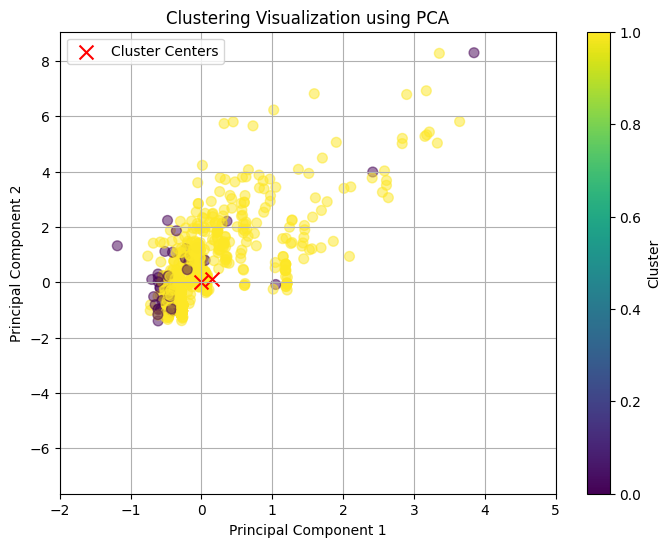

In [19]:
from sklearn.cluster import KMeans

# Assuming reg_df contains your data
# It's generally recommended to scale your data before applying k-means
# This step is especially important if your features are on different scales
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(reg_df)

# Define the number of clusters (k)
k = 2  # You can adjust this number based on your requirements

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# You can assign these cluster labels back to your DataFrame if needed
reg_df['cluster'] = cluster_labels

# You can also access the cluster centers
cluster_centers = kmeans.cluster_centers_

# Evaluate the clustering (optional)
# For example, you can check inertia which is the sum of squared distances of samples to their closest cluster center
inertia = kmeans.inertia_
print("Inertia:", inertia)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5, marker = "o")
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
plt.title('Clustering Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.colorbar(label='Cluster')
plt.xlim([-2, 5])
plt.show()

In [36]:
for index, record in enumerate(escitalopram_dataset.iterrows()):
    print(record)

(203, Unnamed: 0                                                     140891
drugName                                                 Escitalopram
condition                                 Generalized Anxiety Disorde
review              "The time I been on lexapro I had mild side ef...
rating                                                            7.0
date                                                   April 27, 2016
usefulCount                                                        13
processed_review    "the time lexapro mild side effect like yawn i...
cleaned_review      "the time i been on lexapro i had mild side ef...
Anxiety                                                         False
Chest pain                                                      False
Constipation                                                    False
Dizziness                                                       False
Rash                                                            False
Fatigue       

In [47]:
type(record[1]["condition"])

str

In [52]:
pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])

for index, record in enumerate(escitalopram_dataset.iterrows()):
    pca_df.loc[index, "condition"] = record[1]["condition"]
pca_df

PC1       PC2                    condition
0     0.001384  0.507494  Generalized Anxiety Disorde
1    -0.204967  0.771385  Generalized Anxiety Disorde
2    -0.288092 -0.356212                      Anxiety
3    -0.272496 -1.063312                   Depression
4    -0.559271  0.012057                   Depression
...        ...       ...                          ...
1287  1.181163  0.422363                   Depression
1288 -0.046337  0.398186                      Anxiety
1289 -0.040547  0.616059                   Depression
1290 -0.275973 -1.091505                   Depression
1291 -0.375855  0.131066                      Anxiety

[1292 rows x 3 columns]

In [51]:
pca_df

PC1       PC2 condition
0     0.001384  0.507494       NaN
1    -0.204967  0.771385       NaN
2    -0.288092 -0.356212       NaN
3    -0.272496 -1.063312       NaN
4    -0.559271  0.012057       NaN
...        ...       ...       ...
1287  1.181163  0.422363       NaN
1288 -0.046337  0.398186       NaN
1289 -0.040547  0.616059       NaN
1290 -0.275973 -1.091505       NaN
1291 -0.375855  0.131066       NaN

[1292 rows x 3 columns]

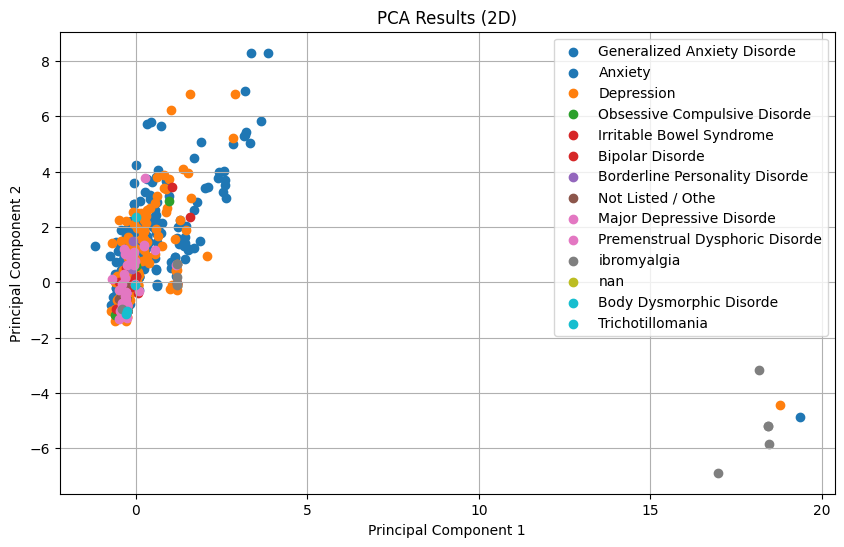

In [53]:
# pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])

# # Add the condition column back to the DataFrame
# pca_df["condition"] = escitalopram_dataset["condition"]

# Plot the PCA results colored by condition
conditions = pca_df["condition"].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(conditions)))

plt.figure(figsize=(10, 6))
for i, condition in enumerate(conditions):
    condition_data = pca_df[pca_df["condition"] == condition]
    plt.scatter(condition_data["PC1"], condition_data["PC2"], color=colors[i], label=condition)

plt.title("PCA Results (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()